In [3]:
import pandas as pd
df=pd.read_excel("suicide_data.xlsx")
print(df.isnull().sum())
print(df.describe())

სუიციდი/სუიციდის მცდელობა    0
ასაკი                        0
სქესი                        0
მოქალაქეობა                  0
რეგიონი                      0
წელი                         0
dtype: int64
             ასაკი         წელი
count  4062.000000  4062.000000
mean     41.719104  2020.819793
std      19.301012     1.358085
min       6.000000  2019.000000
25%      27.000000  2020.000000
50%      38.000000  2021.000000
75%      55.000000  2022.000000
max     104.000000  2023.000000


In [4]:
attemp_count = df["სუიციდი/სუიციდის მცდელობა"].apply(lambda x: "სუიციდის მცდელობა" in str(x)).sum()
print(f"სულ ჩანაწერები - {df["სუიციდი/სუიციდის მცდელობა"].count()}")
print(f"სუიციდის მცდელობა - {attemp_count}")
print(f"სუიციდი - {df["სუიციდი/სუიციდის მცდელობა"].count()-attemp_count}")


სულ ჩანაწერები - 4062
სუიციდის მცდელობა - 2013
სუიციდი - 2049


In [5]:
print(f"{df['სქესი'].value_counts()}")
print(f"\n{df['რეგიონი'].value_counts()}")
print(f"\n{df['მოქალაქეობა'].value_counts()}")
print(f"\n{df['წელი'].value_counts()}")


სქესი
მამრობითი     2894
მდედრობითი    1168
Name: count, dtype: int64

რეგიონი
თბილისი                                   1127
სამეგრელო-ზემო სვანეთი                     598
იმერეთი, რაჭა-ლეჩხუმი და ქვემო სვანეთი     560
აჭარა                                      474
კახეთი                                     340
ქვემო ქართლი                               295
შიდა ქართლი                                276
სამცხე-ჯავახეთი                            144
გურია                                      125
მცხეთა-მთიანეთი                            116
აფხაზეთი                                     7
Name: count, dtype: int64

მოქალაქეობა
საქართველო           3946
რუსეთი                 41
თურქეთი                19
აზერბაიჯანი            11
ირანი                   7
უკრაინა                 7
ბელარუსი                5
ყაზახეთი                4
უცნობია                 4
უზბეკეთი                3
ინდოეთი                 2
ლიბანი                  2
საბერძნეთი              1
გერმანია                1
ა

## EDA

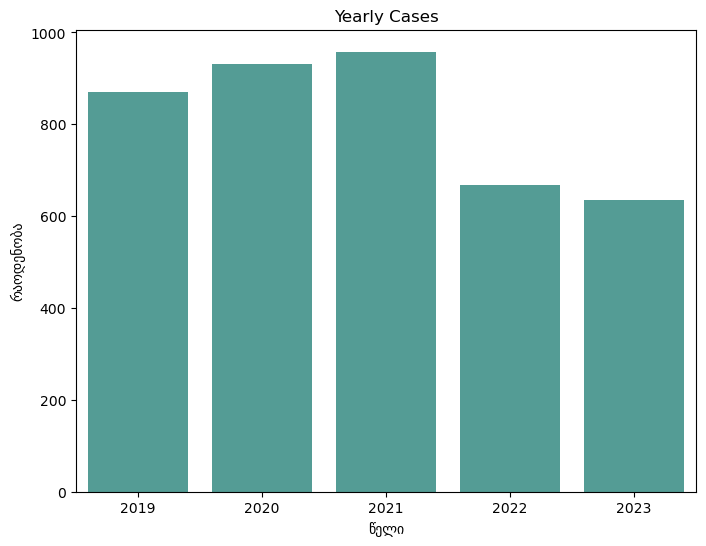

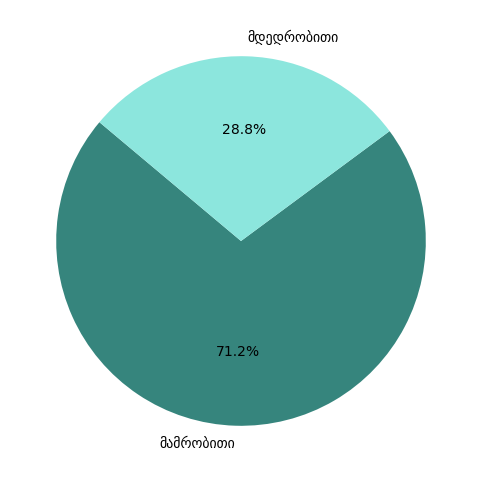

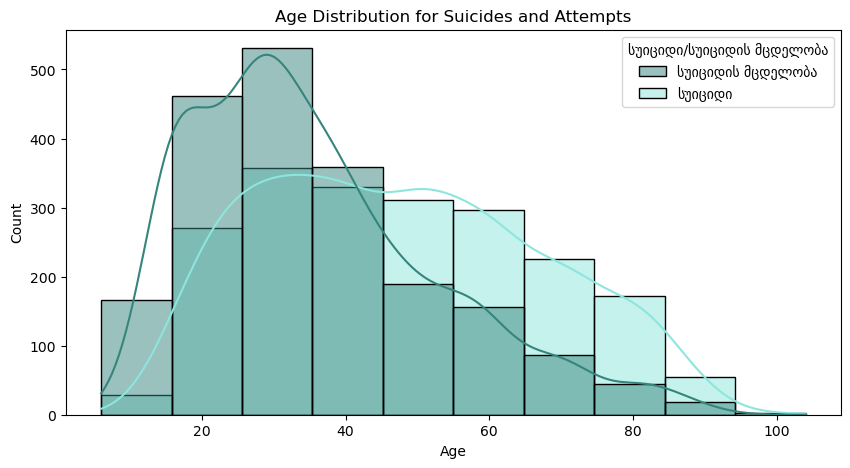

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# before splitting
yearly_data = df.groupby('წელი')['სუიციდი/სუიციდის მცდელობა'].count()
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_data.index, y=yearly_data.values, color="#48a89f")
plt.title("Yearly Cases")
plt.xlabel("წელი")
plt.ylabel("რაოდენობა")
plt.show()


gender_data = df['სქესი'].value_counts()
plt.figure(figsize=(6, 6))
gender_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#36857d', '#8ce6dd'])
plt.ylabel("")
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='ასაკი', hue='სუიციდი/სუიციდის მცდელობა', kde=True, bins=10, palette=['#36857d', '#8ce6dd'])
plt.title('Age Distribution for Suicides and Attempts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Split data into Suicide and Suicide attempts cases

In [9]:
suicide_df = df[df['სუიციდი/სუიციდის მცდელობა'] == 'სუიციდი']
attempts_df = df[df['სუიციდი/სუიციდის მცდელობა'] == 'სუიციდის მცდელობა']

Work on suicide data

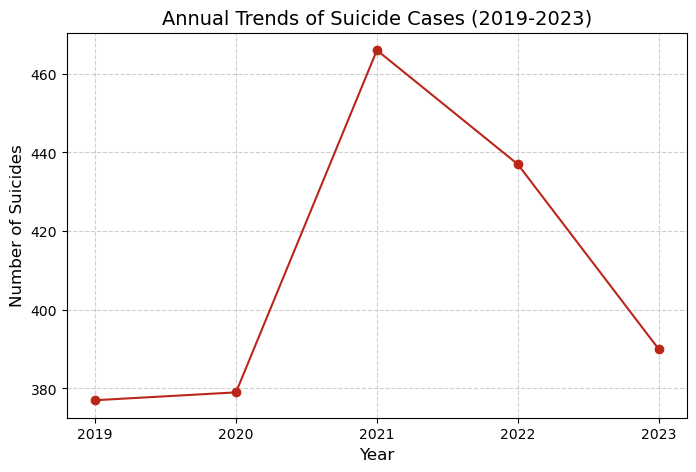

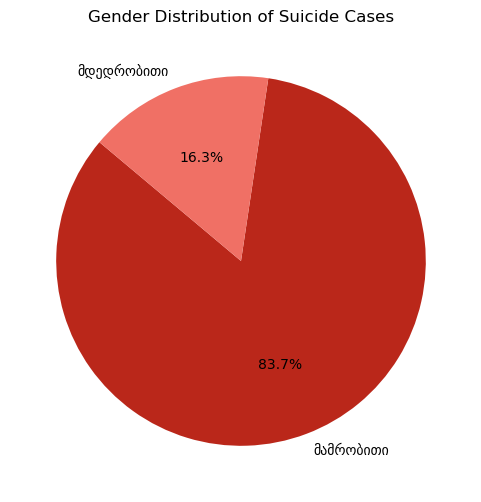

In [74]:
# Yearly suicide analysis
annual_trends = suicide_df.groupby('წელი').size()
plt.figure(figsize=(8, 5))
plt.plot(annual_trends.index, annual_trends.values, marker='o', color='#ba271a', linestyle='-')
plt.title("Annual Trends of Suicide Cases (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Suicides", fontsize=12)
plt.xticks(range(2019, 2024)) 
plt.grid(True, linestyle='--', alpha=0.6)


# Gender analysis
sc_gender_data = suicide_df['სქესი'].value_counts()
plt.figure(figsize=(6, 6))
sc_gender_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ba271a', '#f07065'])
plt.title("Gender Distribution of Suicide Cases")
plt.ylabel("")



plt.show()


# # The most suicide cases in 2021 
# # Males


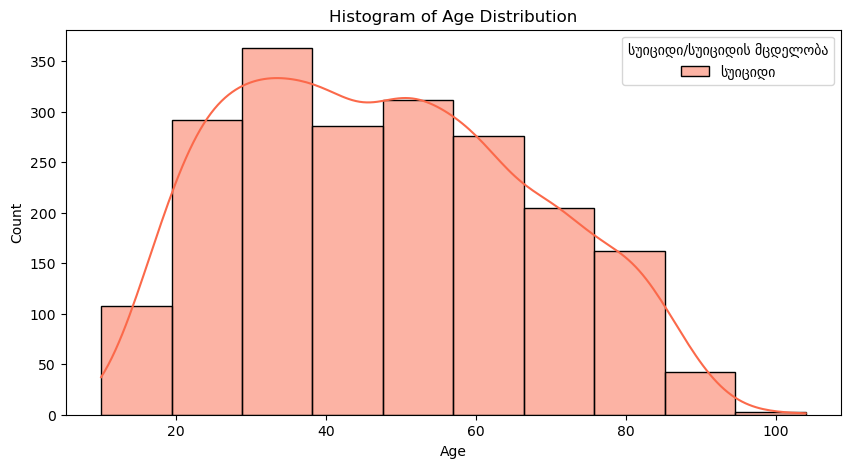

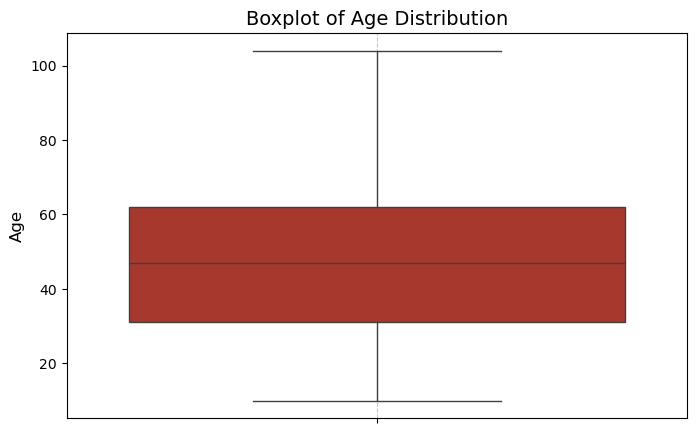

In [76]:
# Age distribution analysis
plt.figure(figsize=(10, 5))
sns.histplot(data=suicide_df, x='ასაკი', hue='სუიციდი/სუიციდის მცდელობა', kde=True, bins=10, palette='Reds')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# With boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=suicide_df['ასაკი'], color='#ba271a')
plt.title("Boxplot of Age Distribution", fontsize=14)
plt.ylabel("Age", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [94]:
# Region distribution analysis
# plt.figure(figsize=(10, 6))
# sns.countplot(data=suicide_df, y='რეგიონი', hue='სუიციდი/სუიციდის მცდელობა', palette=['#ba271a', '#f07065'])
# plt.title('Region Distribution for Suicides')
# plt.xlabel('Count')
# plt.ylabel('Region')
# plt.show()

